In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import time
import timeit
from typing import Final

In [2]:
# NUM_REGISTROS: Final[int] = 4.5 * 10**9
NUM_REGISTROS: Final[int] = 0.1 * 10**9
ARRAY_NUMEROS = np.arange(NUM_REGISTROS, dtype=np.uint32)

print(f"{ARRAY_NUMEROS.size = :,}")

ARRAY_NUMEROS.size = 100,000,000


In [3]:
# Import módulos Cython
from src import get_max_value_C

In [4]:
get_max_value_C(ARRAY_NUMEROS)

99999999

In [5]:
np.max(ARRAY_NUMEROS) == get_max_value_C(ARRAY_NUMEROS)

np.True_

In [6]:
# -n<N>: execute the given statement <N> times in a loop.
# -r<R>: number of repeats <R>, each consisting of <N> loops, and take the average result.
# -p<P>: use a precision of <P> digits to display the timing result.

# Cython (Função em C)
%timeit -r 1 -p 5 get_max_value_C(ARRAY_NUMEROS)
# Usando Numpy
%timeit -r 1 -p 5 np.max(ARRAY_NUMEROS)

30.925 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)
44.548 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 10 loops each)


In [7]:
NUM_REPETICOES: Final[int] = 1_000
TOTAL_NUMEROS_INSPECIONADOS: int = NUM_REPETICOES * NUM_REGISTROS * 2 # O 2 vem do Cython e do NumPy
TOTAL_FORMATADO: str = f"{TOTAL_NUMEROS_INSPECIONADOS:,.0f}".replace(',', '.')

print(f"Números de repetições: {NUM_REPETICOES}")
print(f"Quantidade total de números inspecionados: {TOTAL_FORMATADO}")

print("Cython iniciado")
t1 = time.time()

# O Timeit usa o "perf_counter" como timer padrão
# Fonte: https://docs.python.org/3/library/timeit.html#timeit.default_timer
tempos_get_max_value_C: list[float] = timeit.repeat(
    "get_max_value_C(ARRAY_NUMEROS)",
    globals=globals(),
    repeat=NUM_REPETICOES,
    number=1,
)
print(f"Cython terminado após {time.time() - t1:.5f}s")

print("Numpy iniciado")
t1 = time.time()
tempos_get_max_value_np: list[float] = timeit.repeat(
    "np.max(ARRAY_NUMEROS)",
    globals=globals(),
    repeat=NUM_REPETICOES,
    number=1,
)
print(f"NumPy terminado após {time.time() - t1:.5f}s")

tempos_get_max_value = pd.DataFrame(
    data={
        "C": tempos_get_max_value_C,
        "NumPy": tempos_get_max_value_np,
    }
)


Números de repetições: 1000
Quantidade total de números inspecionados: 200.000.000.000
Cython iniciado
Cython terminado após 28.27072s
Numpy iniciado
NumPy terminado após 35.91764s


In [8]:
tempos_get_max_value.describe()

,C,NumPy
count,1000.000000,1000.000000
mean,0.028269,0.035894
std,0.000755,0.001513
min,0.027490,0.034295
25%,0.027800,0.035223
50%,0.028020,0.035576
75%,0.028624,0.036152
max,0.034687,0.061743


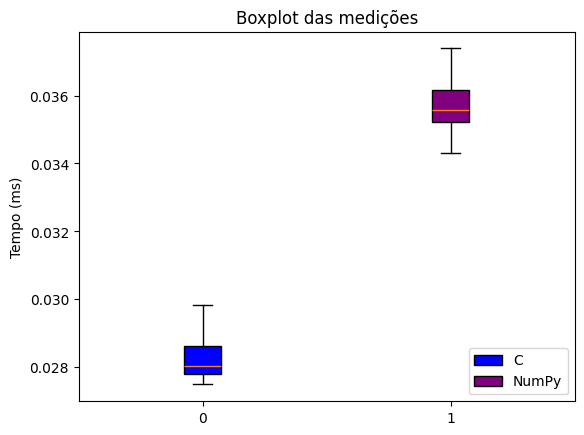

In [9]:
FACECOLORS: Final[tuple[str]] = (
    "blue", "purple", "brown"
)

fig, ax = plt.subplots()

for key, value in enumerate(tempos_get_max_value.columns):
    ax.boxplot(
        tempos_get_max_value[value],
        positions=[key],
        patch_artist=True,
        boxprops={"facecolor": FACECOLORS[key]},
        showfliers=False,
        label=value,
        )

ax.legend(loc="lower right")
plt.title("Boxplot das medições")
plt.ylabel("Tempo (ms)")
plt.show()

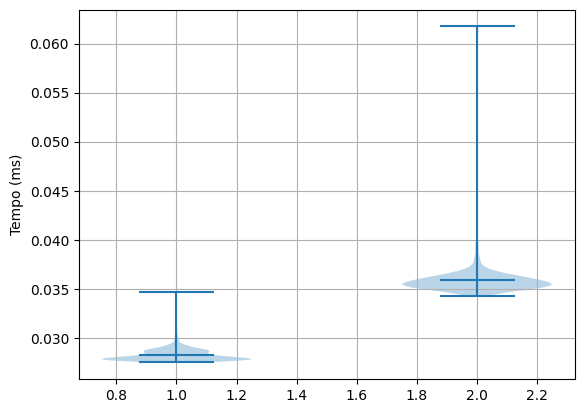

In [10]:
plt.violinplot(
    tempos_get_max_value,
    showmeans=True,
    showextrema=True,
)
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.show()

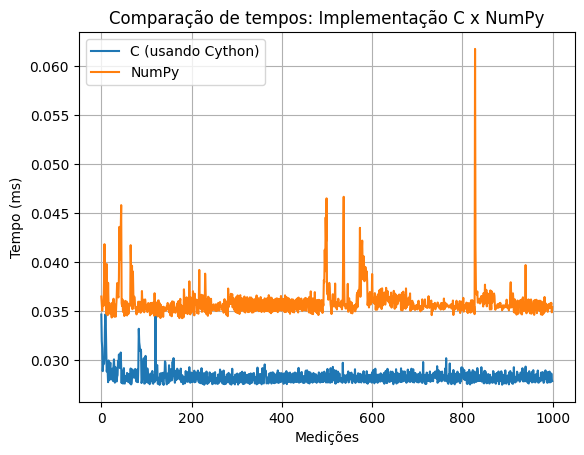

In [11]:
plt.plot(
    tempos_get_max_value[["C","NumPy"]],
)
plt.title("Comparação de tempos: Implementação C x NumPy")
plt.xlabel("Medições")
plt.ylabel("Tempo (ms)")
plt.grid(True)
plt.legend(["C (usando Cython)","NumPy"])

plt.show()

## Testes metodologia:

```python
from src import get_max_value_C as get_numero_mais_alto_usando_cython

def get_numero_mais_alto(lista: list[int]) -> int:
    numero_mais_alto: int = lista[0]

    for numero in lista:
        if numero > numero_mais_alto:
            numero_mais_alto = numero
    return numero_mais_alto

# Um BILHÃO de números
lista_teste_maior_numero: list[int] = np.arange(1_000_000_000, dtype=np.uint32)

print("Implementação CPython:")
t1 = time.perf_counter()
print(f"Número mais alto: {get_numero_mais_alto(lista_teste_maior_numero)}")
t2 = time.perf_counter()
tempo_execucao_py: float = t2 - t1
print(f"Tempo de execução: {tempo_execucao_py:.5f}s")

print("Implementação Cython:")
t1 = time.perf_counter()
print(f"Número mais alto: {get_numero_mais_alto_usando_cython(lista_teste_maior_numero)}")
t2 = time.perf_counter()
tempo_execucao_cy: float = t2 - t1
print(f"Tempo de execução: {tempo_execucao_cy:.5f}s")

print(f"O código Cython foi {tempo_execucao_py / tempo_execucao_cy:.3f} vezes mais rápido!")
```
